In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pylab import rcParams

%run GR

In [3]:
#read in raw data and extract mean growth rates
GDats1 = process_GR('181002 TetERO1.csv', starting_row=0, normalise=True, control_condition="R1158")
GDats2 = process_GR('181015 TetERO1.csv', starting_row=0, normalise=True, control_condition="R1158")

In [2]:
GDats = pd.read_csv('TetEroGrowth.csv')
GDats_plot = GDats.loc[GDats['Plasmid'] != 'R1158']
GDats_plot.head()

,Plasmid,Conc,Rel_GR
8,Tet-ERO1,0.0,1.021831
9,Tet-ERO1,0.0,1.011155
10,Tet-ERO1,0.0,0.977552
11,Tet-ERO1,0.0,0.985937
12,Tet-ERO1,0.0,0.892833


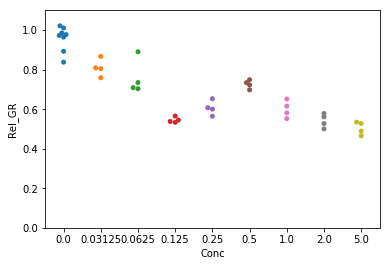

In [14]:
plt.close()
ax = sns.swarmplot(x='Conc', y='Rel_GR', data=GDats_plot)
plt.ylim(0,1.1)
plt.savefig('relero1.svg')
plt.show()

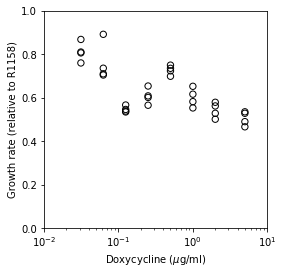

In [4]:
plt.close()
f, ax = plt.subplots(figsize=(4,4))
ax.set_xscale("log")
ax.scatter(x = 'Conc', y = 'Rel_GR', data = GDats_plot, s = 40, facecolors = 'none', edgecolors = 'black')
ax.set(ylim=(0,1),xlim = (0.01,10), ylabel='Growth rate (relative to R1158)', xlabel = r'Doxycycline ($\mu$g/ml)')
plt.savefig('Eroconcs.svg')
plt.show()

In [8]:
raw1 = pd.read_csv('181002 TetERO1.csv')
raw2 = pd.read_csv('181015 TetERO1.csv')

In [9]:
raw1.head()

,Sample,Row,Col,0,0.5,1,1.5,2,2.5,3,...,24,24.5,25,25.5,26,26.5,27,27.5,28,28.5
0,R1158,A,1,0.347,0.144,0.157,0.162,0.184,0.198,0.227,...,2.479,2.512,2.539,2.532,2.549,2.546,2.568,2.590,2.559,2.614
1,Tet-ERO1,A,2,0.214,0.151,0.159,0.173,0.193,0.213,0.252,...,2.581,2.583,2.617,2.588,2.612,2.628,2.632,2.648,2.604,2.642
2,Tet-ERO1 + 0.03125,A,3,0.292,0.147,0.151,0.162,0.176,0.199,0.222,...,2.512,2.535,2.570,2.571,2.587,2.589,2.640,2.653,2.628,2.654
3,Tet-ERO1 + 0.0625,A,4,0.178,0.146,0.151,0.164,0.181,0.196,0.226,...,2.471,2.501,2.536,2.526,2.564,2.567,2.606,2.642,2.590,2.631
4,Tet-ERO1 + 0.125,A,5,0.175,0.154,0.164,0.168,0.186,0.206,0.228,...,2.262,2.290,2.335,2.373,2.398,2.405,2.428,2.464,2.455,2.493


In [87]:
# define the number last time point to use (the last time used in hours = end /2)
end = 25
#extract data for conditions of interest and average all data for that condition
x = [float(i) for i in list(raw1.columns[4:end])]
wt = raw2.loc[raw2['Sample'] == 'R1158'].iloc[:,4:end].mean()
Tet0 = raw2.loc[raw2['Sample'] == 'Tet-ERO1'].iloc[:,4:end].mean()
Tet125 = raw1.loc[raw1['Sample'] == 'Tet-ERO1 + 0.125'].iloc[:,4:end].mean()
Tet500 = raw2.loc[raw2['Sample'] == 'Tet-ERO1 + 0.5'].iloc[:,4:end].mean()

# normalise all growth curves to the same starting oD 
refoD = min(wt[0],Tet0[0],Tet125[0], Tet500[0])
wt = wt - (wt[0] - refoD)
Tet0 = Tet0 - (Tet0[0] - refoD)
Tet125 = Tet125 - (Tet125[0] - refoD)
Tet500 = Tet500 - (Tet500[0] - refoD)

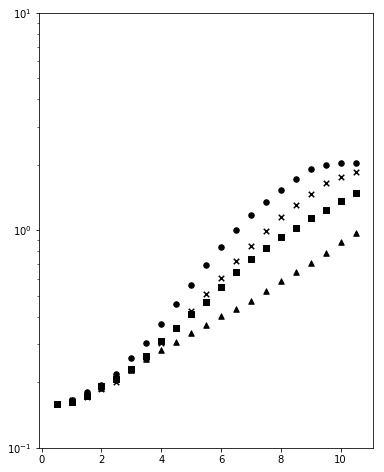

In [108]:
plt.close()
size = 30
plt.scatter(x=x,y=wt, marker = 'o', c='black', s=size)
plt.scatter(x=x,y=Tet0, marker = 'x', c='black', s=size)
plt.scatter(x=x,y=Tet125, marker = '^', c='black', s=size)
plt.scatter(x=x,y=Tet500, marker = 's', c='black', s=size)
plt.yscale("log")
plt.ylim(0.1,10)
rcParams['figure.figsize'] = 6,8
plt.savefig('TetERO1.svg')
plt.show()